Displaying the Raw Image...


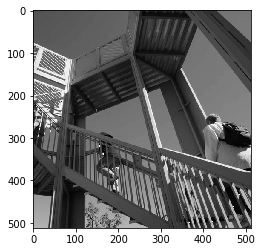

Displaying the Image after Applying Filter to it ...


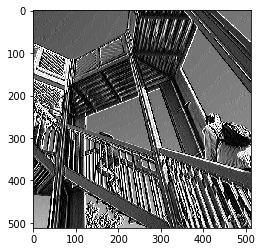

Displaying the Image after applying Pooling


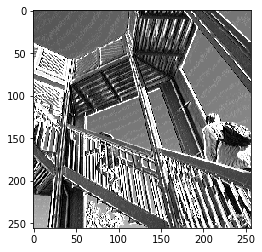

In [2]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

# getting the image dataset
i = misc.ascent()

# code to display the image
print("Displaying the Raw Image...")
#plt.grid(False)
plt.gray()
#plt.axis('off')
plt.imshow(i)
plt.show()

# getting dimension of the image

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
# assigning filter and weight for creating convolution matrix
'''
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
'''

filter = [[-1,-5,0], [1,0,0], [0,5,1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

# creating convolution matrix of 3x3 array.
for x in range(1, size_x-1):
  for y in range (1, size_y-1):
    output_pixel = 0.0
    output_pixel = output_pixel + (i[x-1, y-1] * filter[0][0])
    output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
    output_pixel = output_pixel + (i[x+1, y-1] * filter[0][2])

    output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
    output_pixel = output_pixel + (i[x, y] * filter[1][1])
    output_pixel = output_pixel + (i[x+1, y] * filter[1][2])

    output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
    output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
    output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])

    if(output_pixel < 0):
      output_pixel = 0
    if(output_pixel > 255.0):
      output_pixel = 255
    i_transformed[x,y] = output_pixel

# Plot the image. Note the size of the axes -- they are 512 by 512
print("Displaying the Image after Applying Filter to it ...")
plt.gray()
#plt.axis('off')
plt.imshow(i_transformed)
plt.show()


# Pooling code for (2,2) which will generate an image with 1/4th size of the original iamge
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2), int(y/2)] = pixels[0]

# Plot the modefied image (size of the axes is now 256 instead of 512)
print("Displaying the Image after applying Pooling")
plt.gray()
plt.grid(False)
#plt.axis('off')
plt.imshow(newImage)
plt.show()

